<a href="https://colab.research.google.com/github/ubsuny/g2coral-CP2P2024/blob/main/tensorflow_object_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
def generate_image(height=28, width=28, radius=5):
    """
    Generate an image of size (height, width) with a white disk of given radius.
    The disk's center is randomly placed within the image.

    Parameters:
    - height: Height of the image.
    - width: Width of the image.
    - radius: Radius of the white disk.

    Returns:
    - A 2D NumPy array representing the generated image.
    """
    # Create a black background
    image = np.zeros((height, width), dtype=np.uint8)

    # Generate random center coordinates within the image dimensions
    center_x = np.random.randint(0, width)
    center_y = np.random.randint(0, height)

    # Calculate the distance of each point from the center
    Y, X = np.ogrid[:height, :width]
    distance_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

    # Draw the disk
    image[distance_from_center <= radius] = 1.0

    return image, np.array([center_x, center_y])

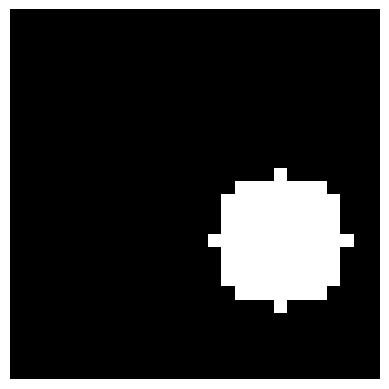

In [ ]:
# Display the image

lol, _ = generate_image()
plt.imshow(lol, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [ ]:
# Generate a dataset of images and labels
num_samples = 5000  # Number of samples
images = []
labels = []

for _ in range(num_samples):
    image, label = generate_image()
    images.append(image)
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Reshape images to match the input shape expected by Keras (add channel dimension)
images = np.expand_dims(images, axis=-1)


# Split dataset into training and validation sets (optional)
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now you can use train_images, train_labels for training and val_images, val_labels for validation in TensorFlow Keras models.

In [ ]:
# Define the CNN model
def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2)  # Two output neurons for x and y coordinates
    ])
    return model

# Create the model
input_shape = train_images[0].shape
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error loss for regression task
              metrics=['mae'])  # Mean Absolute Error metric

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))


Epoch 1/10
125/125 [==============================] - 5s 27ms/step - loss: 47.6466 - mae: 4.5466 - val_loss: 8.5945 - val_mae: 1.8510
Epoch 2/10
125/125 [==============================] - 3s 25ms/step - loss: 4.3994 - mae: 1.2844 - val_loss: 2.6789 - val_mae: 1.0156
Epoch 3/10
125/125 [==============================] - 3s 26ms/step - loss: 1.4726 - mae: 0.7718 - val_loss: 1.0974 - val_mae: 0.6392
Epoch 4/10
125/125 [==============================] - 4s 34ms/step - loss: 0.7369 - mae: 0.5848 - val_loss: 0.6213 - val_mae: 0.5217
Epoch 5/10
125/125 [==============================] - 3s 25ms/step - loss: 0.4338 - mae: 0.4549 - val_loss: 0.4478 - val_mae: 0.4556
Epoch 6/10
125/125 [==============================] - 3s 24ms/step - loss: 0.3121 - mae: 0.3943 - val_loss: 0.2746 - val_mae: 0.3442
Epoch 7/10
125/125 [==============================] - 4s 28ms/step - loss: 0.2306 - mae: 0.3393 - val_loss: 0.2137 - val_mae: 0.3117
Epoch 8/10
125/125 [==============================] - 4s 30ms/step -

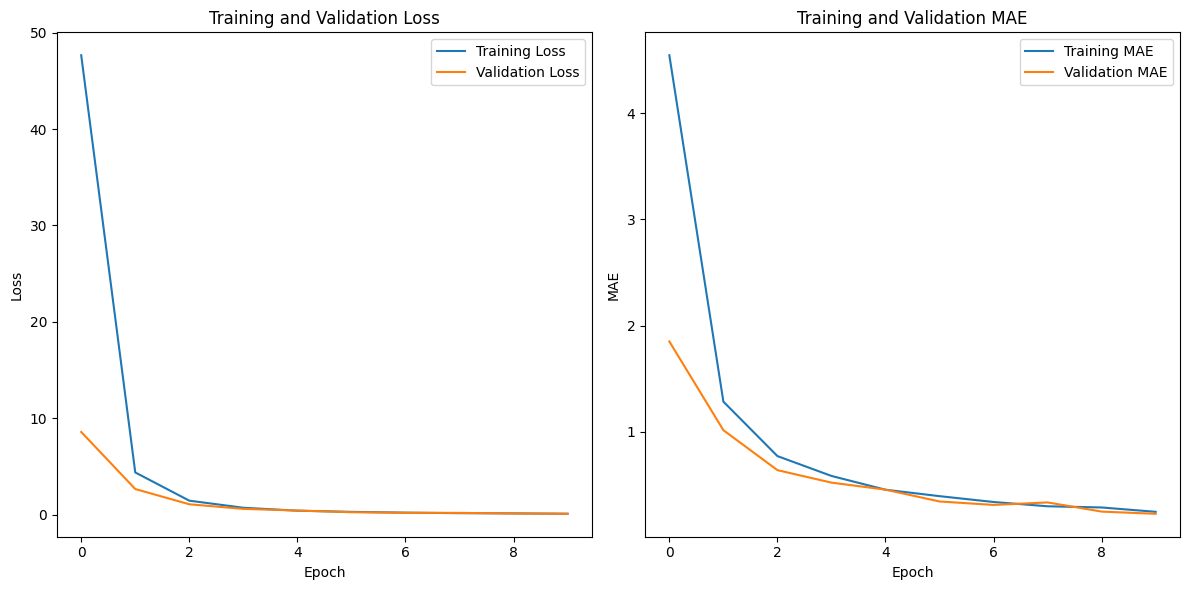

In [ ]:
# Get training history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Generate new images
num_new_images = 10
new_images = []
real_coordinates = []  # Store real coordinates for comparison
for _ in range(num_new_images):
    image, label = generate_image()
    new_images.append(image)
    real_coordinates.append(label)

# Convert lists to numpy arrays
new_images = np.array(new_images)
real_coordinates = np.array(real_coordinates)

# Preprocess the new images (reshape and normalize)
new_images_processed = np.expand_dims(new_images, axis=-1)

# Predict the coordinates using the model
predictions = model.predict(new_images_processed)

# Print both real and predicted coordinates for each image
for i in range(num_new_images):
    real_x, real_y = real_coordinates[i]
    predicted_x, predicted_y = predictions[i]
    print(f"Image {i+1}:")
    print(f"Real coordinates: ({real_x}, {real_y})")
    print(f"Predicted coordinates: ({np.round(predicted_x, decimals=1)}, {np.round(predicted_y,decimals=1)})")
    print()  # Print a newline for better readability

1/1 [==============================] - 0s 50ms/step
Image 1:
Real coordinates: (8, 7)
Predicted coordinates: (8.100000381469727, 7.0)

Image 2:
Real coordinates: (18, 8)
Predicted coordinates: (18.299999237060547, 8.0)

Image 3:
Real coordinates: (3, 20)
Predicted coordinates: (3.0, 19.600000381469727)

Image 4:
Real coordinates: (27, 23)
Predicted coordinates: (27.100000381469727, 22.600000381469727)

Image 5:
Real coordinates: (7, 2)
Predicted coordinates: (7.099999904632568, 1.899999976158142)

Image 6:
Real coordinates: (27, 11)
Predicted coordinates: (27.200000762939453, 10.699999809265137)

Image 7:
Real coordinates: (15, 2)
Predicted coordinates: (15.100000381469727, 2.0)

Image 8:
Real coordinates: (17, 15)
Predicted coordinates: (17.0, 14.800000190734863)

Image 9:
Real coordinates: (15, 4)
Predicted coordinates: (15.300000190734863, 3.9000000953674316)

Image 10:
Real coordinates: (22, 25)
Predicted coordinates: (22.0, 24.299999237060547)



It would not be fair to compare the OpenCV code done in the previous assignment with the TensorFlow code above. That is because the OpenCV code was tested with images of an LED taken with a Baumer cam. However, the above code was tested using simulated images. Simulated images were used because the cameras in the lab were aligned for other purposes.